# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
# Import necessary libraries
import random
import time
from collections import Counter
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from tqdm import tqdm
from wordcloud import WordCloud

import nltk
import spacy

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Randell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Randell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Define the base URL for British Airways reviews and set scraping parameters
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100
# Initialize lists to store scraped data
reviews = []
dates = []
months = []
years = []
ratings = []
titles = []
# Set up headers for the HTTP request to mimic a browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
# Loop through pages to scrape reviews
for i in tqdm(range(1, pages + 1), desc="Scraping pages"):
    # Construct the URL for each page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
  
    # Send a GET request to the URL
    response = requests.get(url, headers=headers)
    content = response.content
  
    # Parse the HTML content
    parsed_content = BeautifulSoup(content, 'html.parser')
  
    # Extract information from each review on the page
    for review in parsed_content.find_all("article", {"itemprop": "review"}):
        # Extract and store the review text
        review_text = review.find("div", {"class": "text_content"})
        if review_text:
            reviews.append(review_text.get_text(strip=True))

        # Extract and store the review date
        date = review.find("time", {"itemprop": "datePublished"})
        if date:
            date_str = date['datetime']
            dates.append(date_str)

            # Convert date string to datetime object and extract month and year
            date_obj = datetime.strptime(date_str, "%Y-%m-%d")
            months.append(date_obj.strftime("%B"))
            years.append(date_obj.year)

        # Extract and store the rating
        rating = review.find("span", {"itemprop": "ratingValue"})
        if rating:
            ratings.append(float(rating.text))
        else:
            ratings.append(None)

        # Extract and store the review title
        title = review.find("h2", {"class": "text_header"})
        if title:
            titles.append(title.text.strip())
        else:
            titles.append(None)

    # Add a random delay between requests to avoid overloading the server
    time.sleep(random.uniform(1, 3))
# Create a DataFrame from the scraped data
data = pd.DataFrame({
    'title': titles,
    'review': reviews,
    'date': dates,
    'month': months,
    'year': years,
    'rating': ratings
})
# Display the first few rows of the DataFrame
print(data.head())
# Print the total number of reviews collected
print(f"Total reviews collected: {len(data)}")
# Save the data to a CSV file
data.to_csv('british_airways_reviews.csv', index=False)
print("Data saved to 'british_airways_reviews.csv'")

Scraping pages: 100%|██████████| 20/20 [01:21<00:00,  4.08s/it]

                                     title  \
0              "never fly with them again"   
1       "still have not heard any updates"   
2                   "cabin crew were nice"   
3  "support staff wash their hands of you"   
4          "no fuss, no bother experience"   

                                              review        date     month  \
0  ✅Trip Verified|   I recently travelled from Mu...  2024-11-03  November   
1  Not Verified|  I paid for seats 80 A and B on ...  2024-11-03  November   
2  Not Verified| The flight wasn’t that bad, alth...  2024-11-03  November   
3  ✅Trip Verified|  I decided to treat myself and...  2024-11-02  November   
4  Not Verified|  I was very impressed with their...  2024-11-02  November   

   year  rating  
0  2024     1.0  
1  2024     3.0  
2  2024     7.0  
3  2024     1.0  
4  2024     9.0  
Total reviews collected: 2000
Data saved to 'british_airways_reviews.csv'


In [3]:
# Display the first few rows of the DataFrame
data.head()

,title,review,date,month,year,rating
0,"""never fly with them again""",✅Trip Verified| I recently travelled from Mu...,2024-11-03,November,2024,1.0
1,"""still have not heard any updates""",Not Verified| I paid for seats 80 A and B on ...,2024-11-03,November,2024,3.0
2,"""cabin crew were nice""","Not Verified| The flight wasn’t that bad, alth...",2024-11-03,November,2024,7.0
3,"""support staff wash their hands of you""",✅Trip Verified| I decided to treat myself and...,2024-11-02,November,2024,1.0
4,"""no fuss, no bother experience""",Not Verified| I was very impressed with their...,2024-11-02,November,2024,9.0


In [4]:
data.tail()

,title,review,date,month,year,rating
1995,"""no better than no frills competitors""",✅Verified Review| London Heathrow to Stuttgar...,2017-02-21,February,2017,1.0
1996,"""professional and friendly""",✅Verified Review| London Heathrow to Las Vega...,2017-02-20,February,2017,8.0
1997,"""on a race to the bottom""",✅Verified Review| London Heathrow to Rome ret...,2017-02-20,February,2017,5.0
1998,"""treats customers with such contempt""",✅Verified Review| Edinburgh to London City. D...,2017-02-20,February,2017,2.0
1999,"""I was highly disappointed""",✅Verified Review| Accra to London Heathrow on...,2017-02-19,February,2017,4.0


In [5]:
import re

# Function to remove prefixesimport re
def remove_prefixes(text):
    prefixes = [
        r'✅\s*Trip Verified\s*\|',
        r'Not Verified\s*\|',
        r'✅\s*verified review\s*\|',
        r'❎\s*not verified\s*\|',
        r'❎\s*unverified\s*\|'
    ]
    pattern = '^(' + '|'.join(prefixes) + r')\s*'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Apply the function and other cleaning steps
data['review'] = data['review'].apply(remove_prefixes)
data['review'] = data['review'].str.lower()
data['review'] = data['review'].str.replace('[^\w\s]', '')

# Verify the changes
print(data.head())


                                     title  \
0              "never fly with them again"   
1       "still have not heard any updates"   
2                   "cabin crew were nice"   
3  "support staff wash their hands of you"   
4          "no fuss, no bother experience"   

                                              review        date     month  \
0  i recently travelled from munich to london wit...  2024-11-03  November   
1  i paid for seats 80 a and b on my flight from ...  2024-11-03  November   
2  the flight wasn’t that bad, although the infli...  2024-11-03  November   
3  i decided to treat myself and my teenage daugh...  2024-11-02  November   
4  i was very impressed with their efficient boar...  2024-11-02  November   

   year  rating  
0  2024     1.0  
1  2024     3.0  
2  2024     7.0  
3  2024     1.0  
4  2024     9.0  


<>:18: SyntaxWarning: invalid escape sequence '\w'
<>:18: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Randell\AppData\Local\Temp\ipykernel_18028\1138594306.py:18: SyntaxWarning: invalid escape sequence '\w'
  data['review'] = data['review'].str.replace('[^\w\s]', '')


In [6]:
data.head()

,title,review,date,month,year,rating
0,"""never fly with them again""",i recently travelled from munich to london wit...,2024-11-03,November,2024,1.0
1,"""still have not heard any updates""",i paid for seats 80 a and b on my flight from ...,2024-11-03,November,2024,3.0
2,"""cabin crew were nice""","the flight wasn’t that bad, although the infli...",2024-11-03,November,2024,7.0
3,"""support staff wash their hands of you""",i decided to treat myself and my teenage daugh...,2024-11-02,November,2024,1.0
4,"""no fuss, no bother experience""",i was very impressed with their efficient boar...,2024-11-02,November,2024,9.0


In [7]:
data.to_csv("british_airways_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

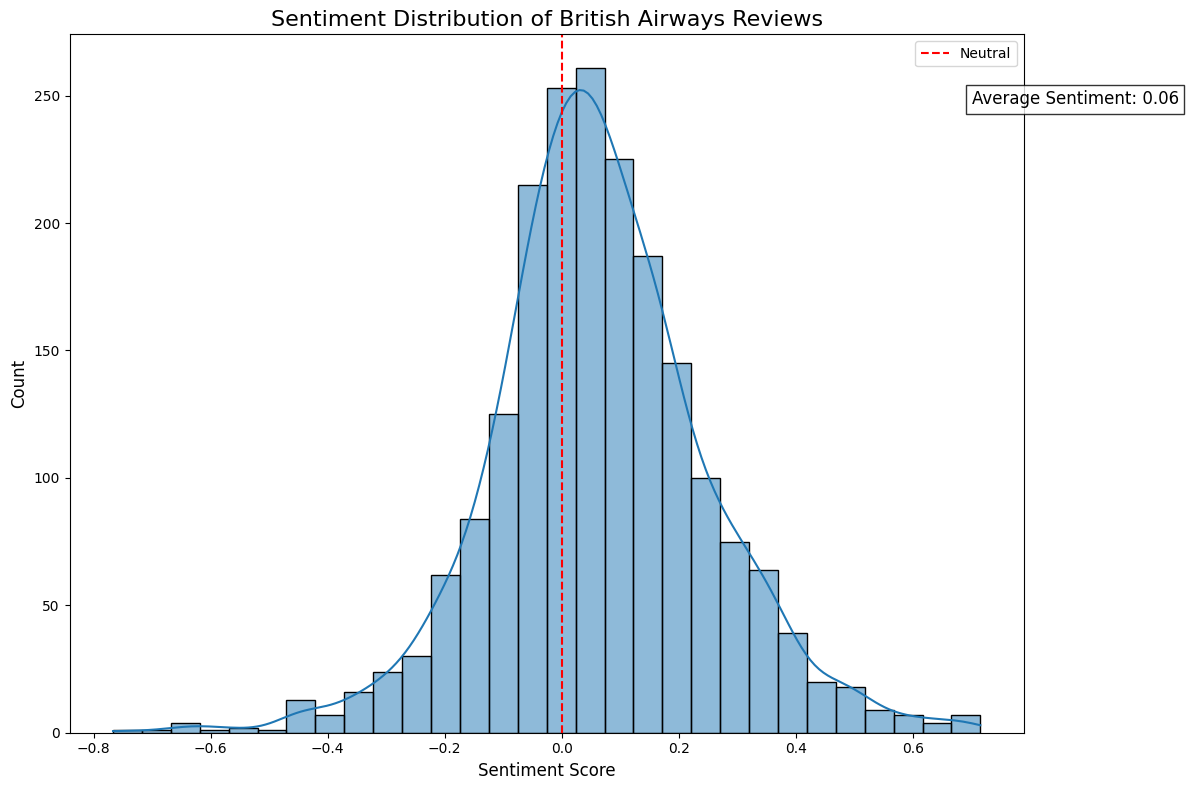

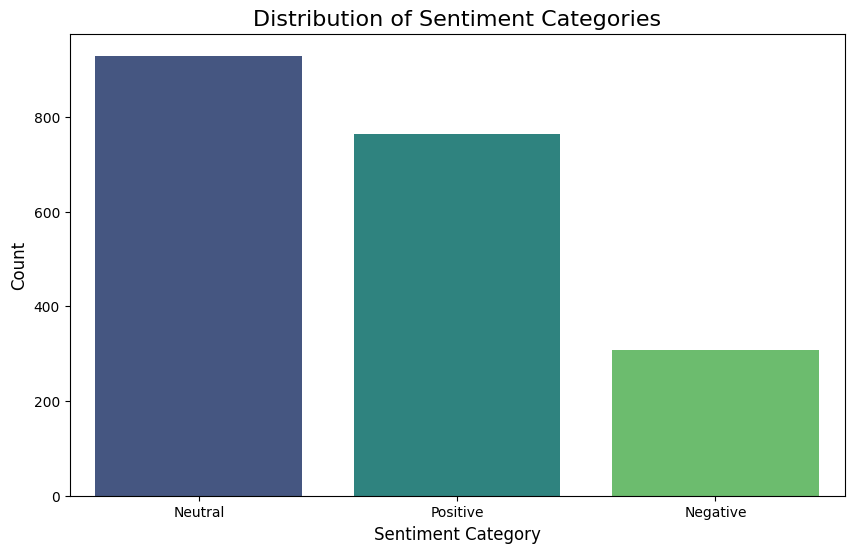

count    2000.000000
mean        0.062479
std         0.185182
min        -0.766667
25%        -0.044689
50%         0.052778
75%         0.168366
max         0.715000
Name: sentiment, dtype: float64

Sentiment Category Counts:
sentiment_category
Neutral     46.45%
Positive     38.2%
Negative    15.35%
Name: proportion, dtype: object


In [8]:
# Perform sentiment analysis
data['sentiment'] = data['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
def categorize_sentiment(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(12, 8))
sns.histplot(data['sentiment'], kde=True, bins=30)
plt.title('Sentiment Distribution of British Airways Reviews', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
plt.legend()

# Add text annotations for average sentiment
avg_sentiment = data['sentiment'].mean()
plt.text(0.7, plt.gca().get_ylim()[1] * 0.9, f'Average Sentiment: {avg_sentiment:.2f}', 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Visualize sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_category', hue='sentiment_category', data=data, palette='viridis', legend=False)
plt.title('Distribution of Sentiment Categories', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Print summary statistics
print(data['sentiment'].describe())
print("\nSentiment Category Counts:")
print(data['sentiment_category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

### Average Sentiment of British Airways Reviews Over Time

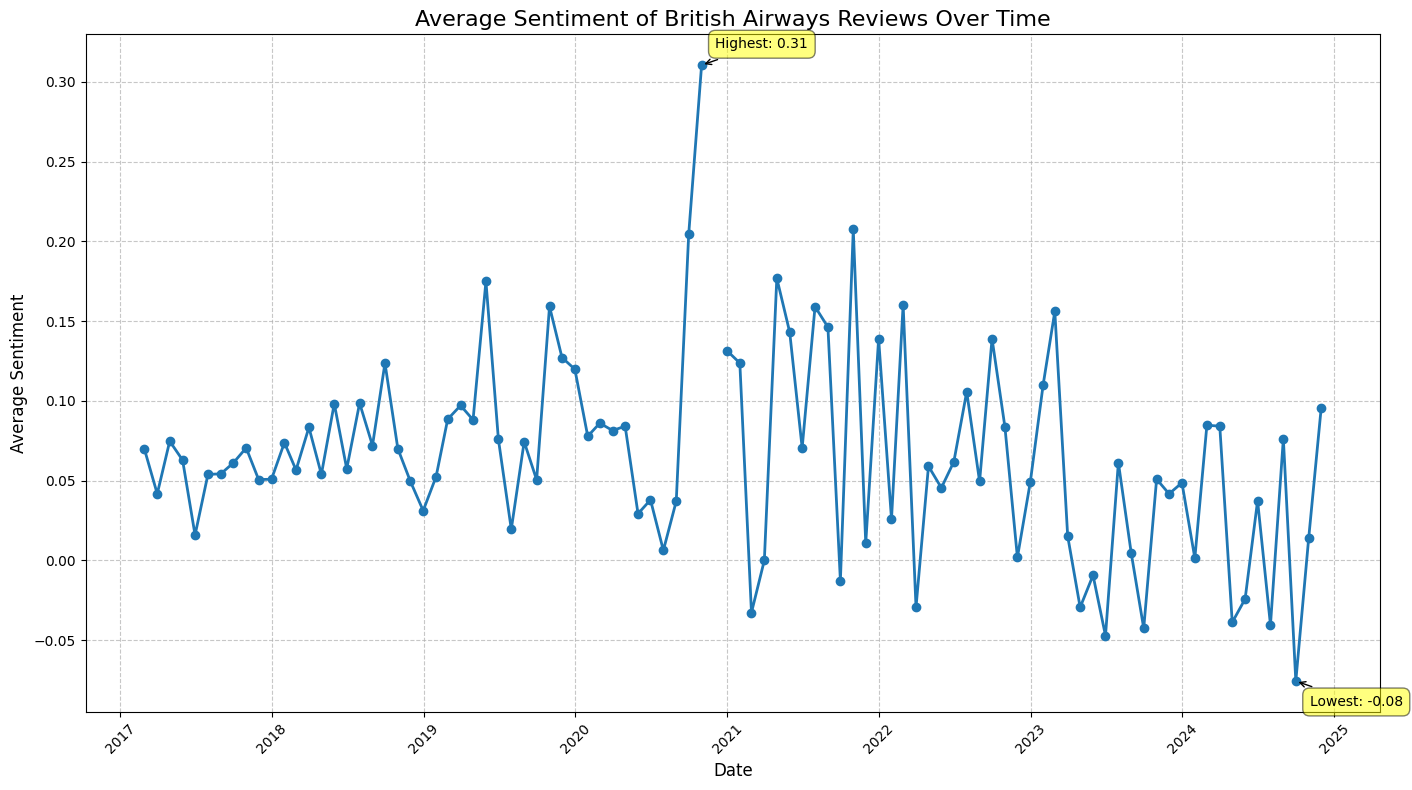

In [9]:
# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Plot average sentiment over time
plt.figure(figsize=(14, 8))
avg_sentiment = data.set_index('date').resample('ME')['sentiment'].mean()
plt.plot(avg_sentiment.index, avg_sentiment.values, marker='o', linestyle='-', linewidth=2, markersize=6)

plt.title('Average Sentiment of British Airways Reviews Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()

# Add annotations for highest and lowest points
max_point = avg_sentiment.idxmax()
min_point = avg_sentiment.idxmin()

plt.annotate(f'Highest: {avg_sentiment[max_point]:.2f}', 
            xy=(max_point, avg_sentiment[max_point]), 
            xytext=(10, 10), 
            textcoords='offset points', 
            ha='left', 
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.annotate(f'Lowest: {avg_sentiment[min_point]:.2f}', 
            xy=(min_point, avg_sentiment[min_point]), 
            xytext=(10, -10), 
            textcoords='offset points', 
            ha='left', 
            va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()


### Enhanced Word Cloud of British Airways Reviews

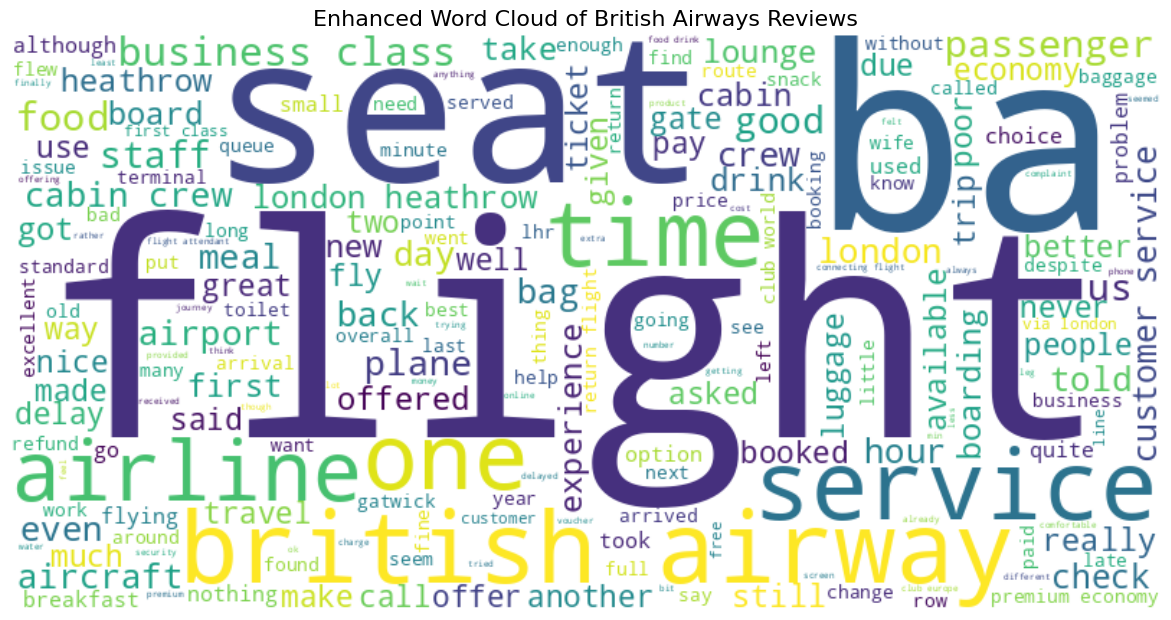

In [10]:
# Generate word cloud
text = ' '.join(data['review'])

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text.lower())
filtered_text = ' '.join([word for word in word_tokens if word.isalnum() and word not in stop_words])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      max_words=200, 
                      contour_width=3, 
                      contour_color='steelblue').generate(filtered_text)

# Display the generated image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Enhanced Word Cloud of British Airways Reviews', fontsize=16)
plt.tight_layout(pad=0)
plt.show()


In [11]:

# Prepare data for topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(data['review'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

print_top_words(lda, vectorizer.get_feature_names_out(), 10)


Topic 1: flight, ba, hours, london, airport, told, day, time, service, hour
Topic 2: flight, crew, ba, seat, passengers, check, cabin, staff, boarding, time
Topic 3: ba, flight, service, british, airways, airline, customer, london, refund, seats
Topic 4: flight, ba, food, good, service, class, crew, seat, business, cabin
Topic 5: luggage, london, asked, bag, staff, cabin, did, said, airways, flight


### Average Sentiment by Month

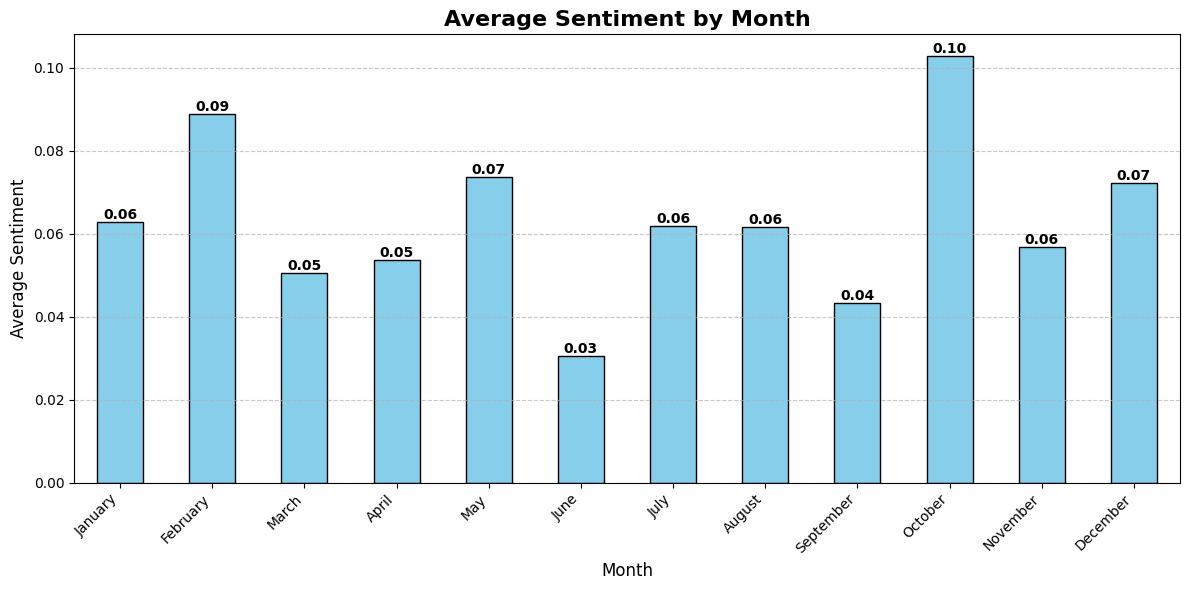

In [12]:
# Analyze sentiment by month
monthly_sentiment = data.groupby('month')['sentiment'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sentiment = monthly_sentiment.reindex(month_order)

plt.figure(figsize=(12, 6))
ax = monthly_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Sentiment by Month', fontsize=16, fontweight='bold')
plt.ylabel('Average Sentiment', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(monthly_sentiment):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()


### Average Sentiment Trend Over Years

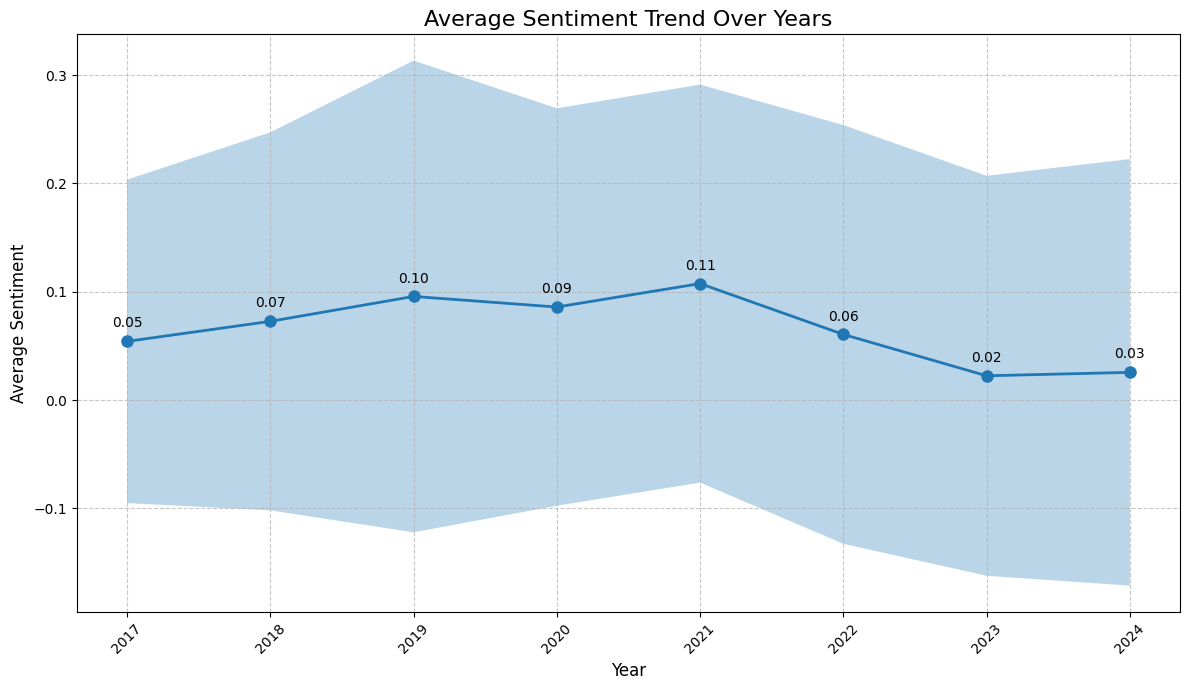

In [13]:
# Analyze sentiment trends over years
yearly_sentiment = data.groupby('year')['sentiment'].mean()
yearly_sentiment_std = data.groupby('year')['sentiment'].std()

plt.figure(figsize=(12, 7))
plt.plot(yearly_sentiment.index, yearly_sentiment.values, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.fill_between(yearly_sentiment.index, yearly_sentiment - yearly_sentiment_std, yearly_sentiment + yearly_sentiment_std, alpha=0.3)

plt.title('Average Sentiment Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sentiment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()

for i, (year, sentiment) in enumerate(yearly_sentiment.items()):
    plt.annotate(f'{sentiment:.2f}', (year, sentiment), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


### Sentiment Distribution for Top 5 Aspects


Aspect: flight
  Average sentiment: 0.07
  Number of reviews: 942
  Percentage of total reviews: 47.10%

Aspect: seat
  Average sentiment: 0.07
  Number of reviews: 635
  Percentage of total reviews: 31.75%

Aspect: ba
  Average sentiment: 0.06
  Number of reviews: 575
  Percentage of total reviews: 28.75%

Aspect: service
  Average sentiment: 0.07
  Number of reviews: 584
  Percentage of total reviews: 29.20%

Aspect: crew
  Average sentiment: 0.12
  Number of reviews: 528
  Percentage of total reviews: 26.40%

Aspect: food
  Average sentiment: 0.09
  Number of reviews: 451
  Percentage of total reviews: 22.55%

Aspect: staff
  Average sentiment: 0.06
  Number of reviews: 385
  Percentage of total reviews: 19.25%

Aspect: airline
  Average sentiment: 0.03
  Number of reviews: 336
  Percentage of total reviews: 16.80%

Aspect: passenger
  Average sentiment: 0.05
  Number of reviews: 244
  Percentage of total reviews: 12.20%

Aspect: bag
  Average sentiment: 0.06
  Number of reviews: 19

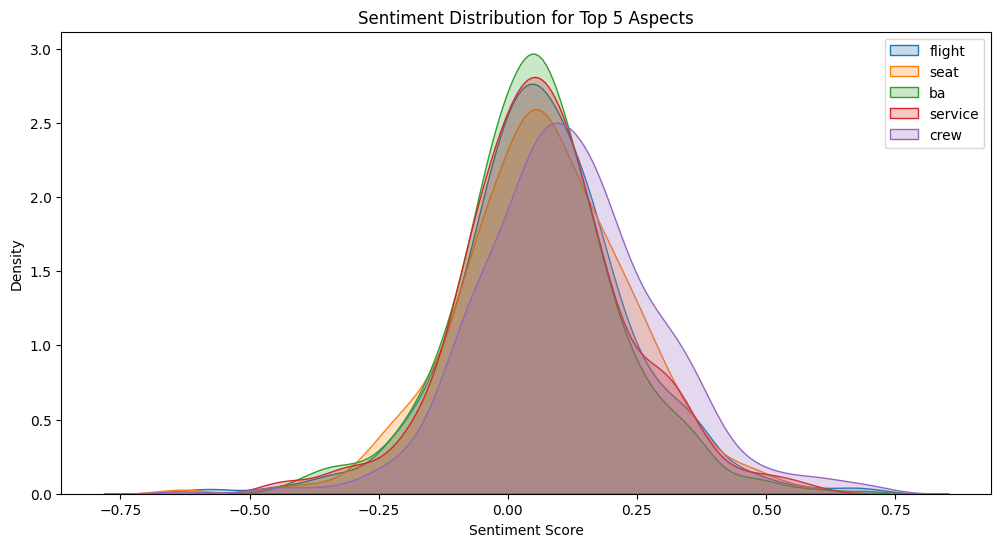

In [14]:
nlp = spacy.load("en_core_web_sm")

def extract_aspects(text):
    doc = nlp(text)
    aspects = [token.lemma_.lower() for token in doc if token.dep_ in ["nsubj", "dobj", "attr"] and token.pos_ in ["NOUN", "PROPN"]]
    return aspects

data['aspects'] = data['review'].apply(extract_aspects)

# Find most common aspects
all_aspects = [aspect for aspects in data['aspects'] for aspect in aspects]
common_aspects = [aspect for aspect, count in Counter(all_aspects).most_common(10)]

# Analyze sentiment for common aspects
for aspect in common_aspects:
    aspect_reviews = data[data['aspects'].apply(lambda x: aspect in x)]
    avg_sentiment = aspect_reviews['sentiment'].mean()
    review_count = len(aspect_reviews)
    print(f"Aspect: {aspect}")
    print(f"  Average sentiment: {avg_sentiment:.2f}")
    print(f"  Number of reviews: {review_count}")
    print(f"  Percentage of total reviews: {(review_count / len(data)) * 100:.2f}%")
    print()

# Visualize sentiment distribution for top 5 aspects

plt.figure(figsize=(12, 6))
for aspect in common_aspects[:5]:
    aspect_sentiments = data[data['aspects'].apply(lambda x: aspect in x)]['sentiment']
    aspect_sentiments = aspect_sentiments.replace([np.inf, -np.inf], np.nan).dropna()
    sns.kdeplot(aspect_sentiments, fill=True, label=aspect)


plt.title("Sentiment Distribution for Top 5 Aspects")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.show()


### Distribution of customer sentiment

The visualization of customer sentiment distribution

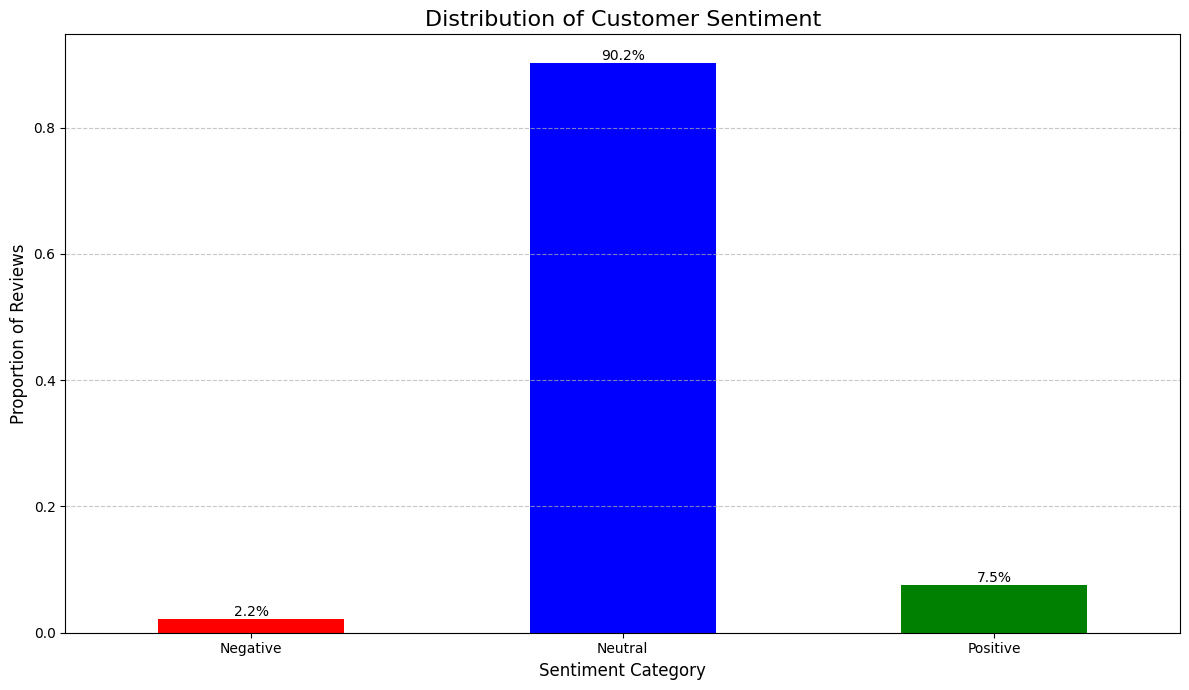

In [15]:
data['sentiment_category'] = pd.cut(data['sentiment'], 
                                    bins=[-1, -0.33, 0.33, 1], 
                                    labels=['Negative', 'Neutral', 'Positive'])

sentiment_distribution = data['sentiment_category'].value_counts(normalize=True)
# Set up the plot
plt.figure(figsize=(12, 7))
# Ensure the colors align with the sentiment categories
sentiment_distribution = sentiment_distribution.sort_index()  # Sort to ensure consistent order
ax = sentiment_distribution.plot(kind='bar', color=['red', 'blue', 'green'])

# Customize the plot
plt.title('Distribution of Customer Sentiment', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Proportion of Reviews', fontsize=12)

# Add percentage labels on top of each bar
for i, v in enumerate(sentiment_distribution):
    ax.text(i, v, f'{v:.1%}', ha='center', va='bottom')

# Improve x-axis labels
plt.xticks(rotation=0)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Relationship between review length and sentiment:
The scatter plot visualizes how the length of customer reviews correlates with sentiment scores. This reveals longer reviews tend to be Neutral.

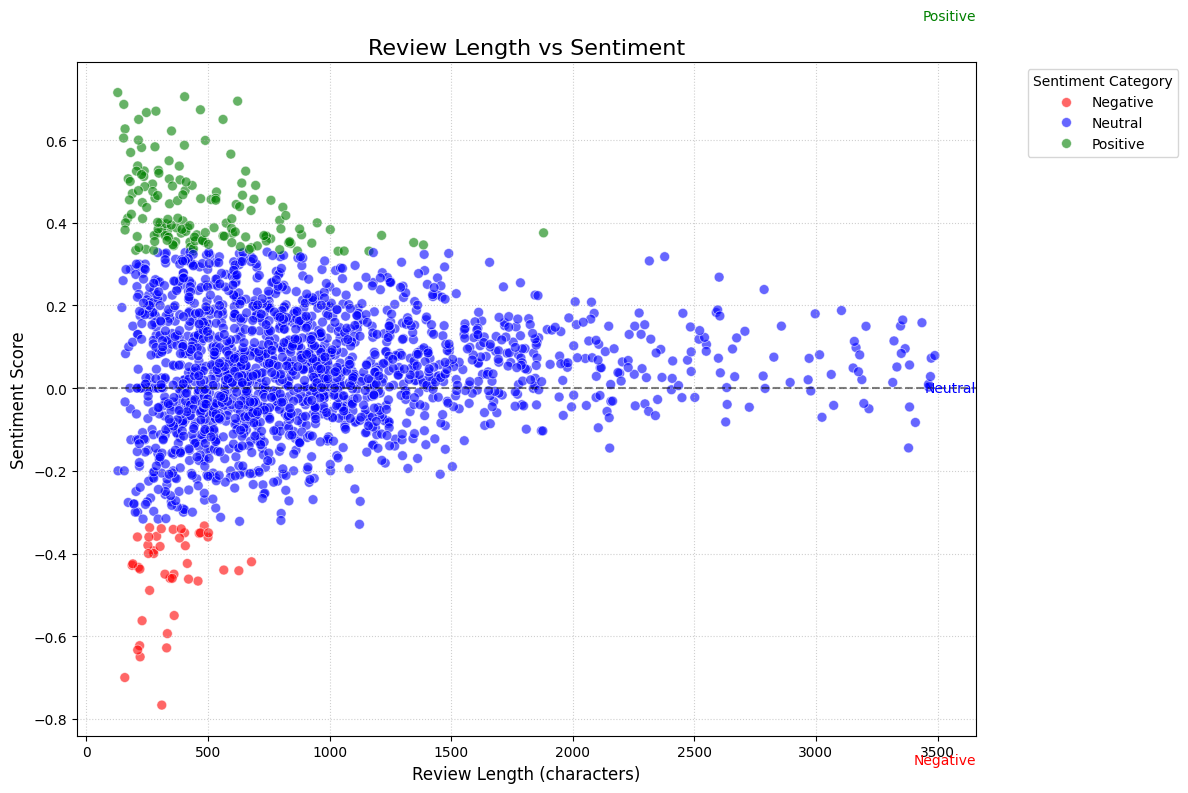

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate review length
data['review_length'] = data['review'].apply(len)

# Set up the plot
plt.figure(figsize=(12, 8))

# Create scatter plot with added features
sns.scatterplot(x='review_length', y='sentiment', data=data, 
                hue='sentiment_category', palette={'Negative': 'red', 'Neutral': 'blue', 'Positive': 'green'},
                alpha=0.6, s=50)

# Customize the plot
plt.title('Review Length vs Sentiment', fontsize=16)
plt.xlabel('Review Length (characters)', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Add text annotations for sentiment categories
plt.text(plt.xlim()[1], 0.9, 'Positive', color='green', ha='right', va='center')
plt.text(plt.xlim()[1], 0, 'Neutral', color='blue', ha='right', va='center')
plt.text(plt.xlim()[1], -0.9, 'Negative', color='red', ha='right', va='center')

# Improve legend
plt.legend(title='Sentiment Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True, linestyle=':', alpha=0.6)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\Randell\AppData\Local\Temp\ipykernel_18028\1453048481.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')


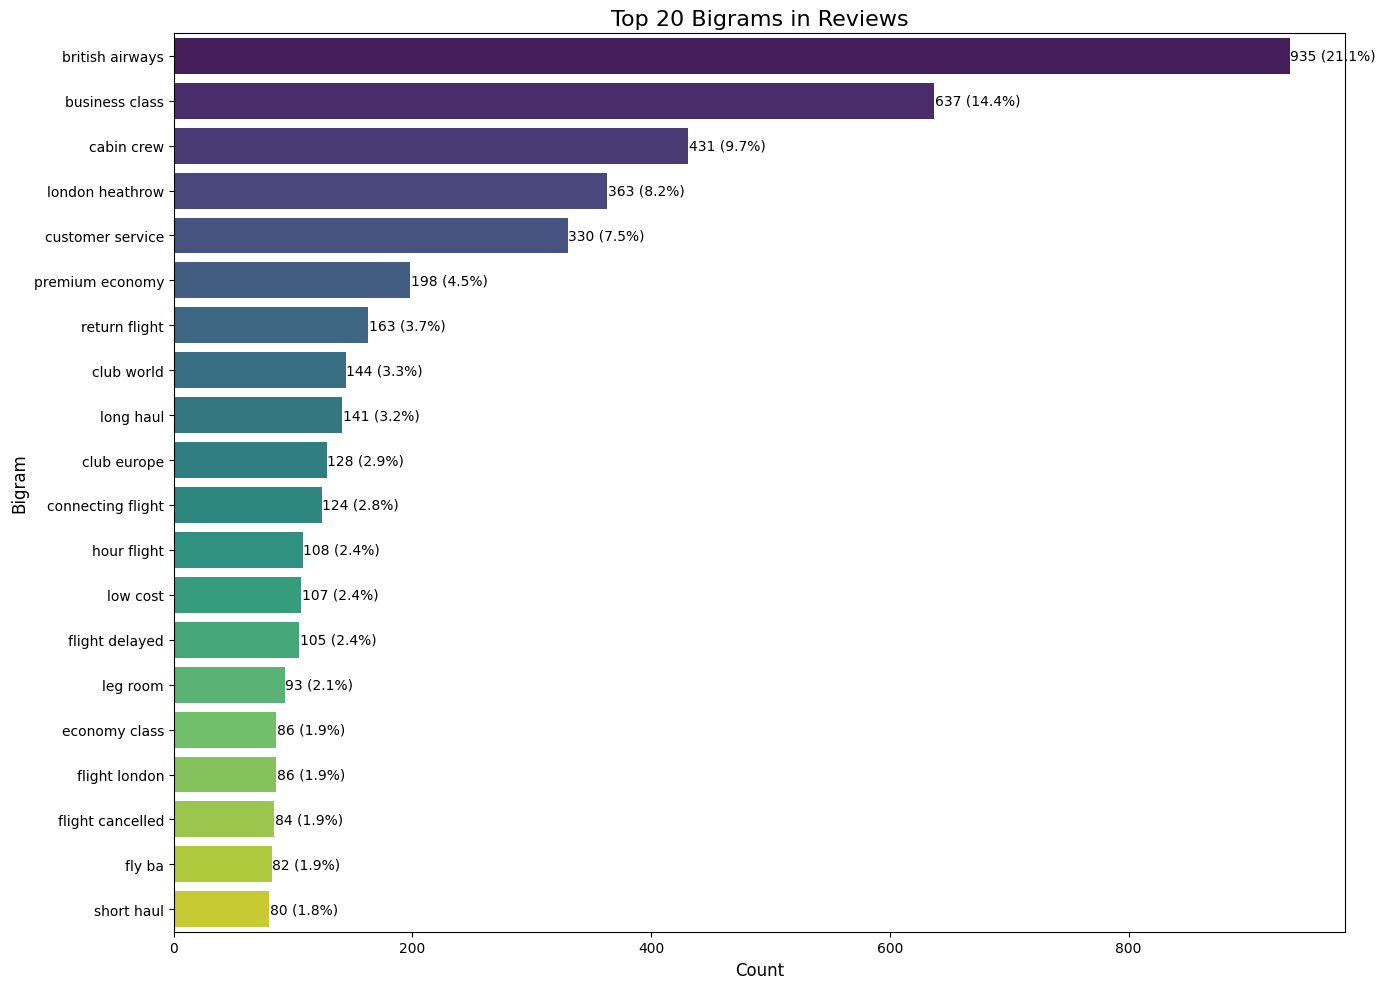

In [17]:

def get_top_n_grams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bigrams
top_bigrams = get_top_n_grams(data['review'], n=20, ngram_range=(2, 2))
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])

# Calculate percentage
total_count = bigram_df['Count'].sum()
bigram_df['Percentage'] = bigram_df['Count'] / total_count * 100

# Create the plot
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Count', y='Bigram', data=bigram_df, palette='viridis')

# Customize the plot
plt.title('Top 20 Bigrams in Reviews', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Bigram', fontsize=12)

# Add count and percentage labels
for i, v in enumerate(bigram_df['Count']):
    ax.text(v + 0.5, i, f'{v} ({bigram_df["Percentage"][i]:.1f}%)', va='center')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Average Sentiment by Day of Week

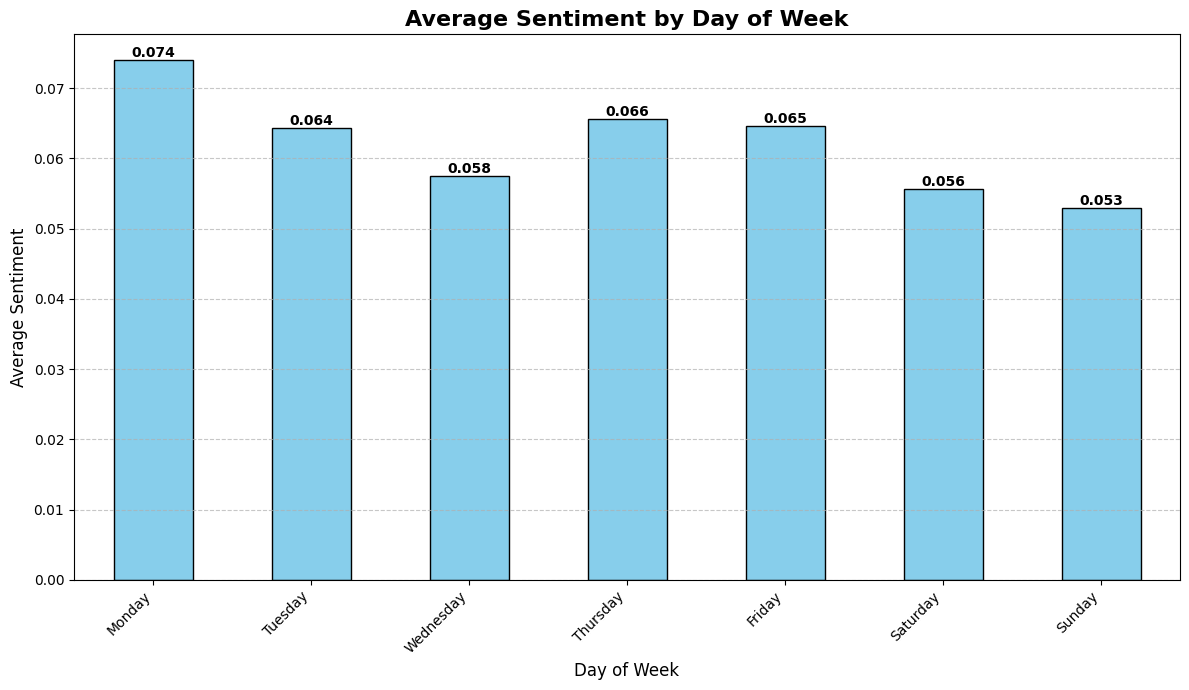

In [18]:
# Extract day of week from date column
data['day_of_week'] = data['date'].dt.day_name()

# Calculate average sentiment for each day of the week
day_sentiment = data.groupby('day_of_week')['sentiment'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar plot
plt.figure(figsize=(12, 7))
ax = day_sentiment.plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot title and labels
plt.title('Average Sentiment by Day of Week', fontsize=16, fontweight='bold')
plt.ylabel('Average Sentiment', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(day_sentiment):
    ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()